In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [301]:
df = pd.read_csv('merged_output.csv')
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'elevation', 'radiation_db',
       'meteo_db', 'year_min', 'year_max', 'use_horizon', 'horizon_db',
       'slope_value', 'slope_optimal', 'azimuth_value', 'azimuth_optimal',
       'type', 'technology', 'peak_power', 'system_loss', 'system_cost',
       'interest', 'lifetime', 'month', 'E_d', 'E_m', 'H(i)_d', 'H(i)_m',
       'SD_m'],
      dtype='object')

In [292]:
df.sample(10)

latitude  longitude  elevation  slope_value  azimuth_value technology  \
281  13.620065  81.138065       24.0    14.331065       3.331065        CIS   
210  13.470445  81.226445       15.0    51.285445      76.285445       c-Si   
172  14.019449  81.197449       15.0    40.961449       5.961449       c-Si   
290  14.032939  81.051939       21.0    33.895939      10.895939        CIS   
41   13.302684  80.177684      156.0    29.085684      61.085684       c-Si   
109  12.254777  77.622777     1865.0    50.962777      68.962777        CIS   
40   13.586233  80.461233      156.0    29.369233      61.369233       c-Si   
153  11.186127  79.723127       90.0    47.116127    -140.883873        CIS   
189  13.231576  80.499576       11.0    33.242576       0.242576       c-Si   
245  13.744749  80.257749      138.0    36.832749     -95.167251        CIS   

     peak_power  system_loss  system_cost   interest   lifetime  month    E_d  \
281    7.961065    16.331065    39.001065  11.331065  16.331065      6  26.11   
210    8.735445    11.285445    41.045445   9.285445  26.285445      7  25.42   
172    6.461449    10.961449    40.411449   8.961449  25.961449      5  20.42   
290    5.145939    10.895939    32.545939   8.895939  15.895939      3  22.80   
41     4.585684    12.085684    44.125684  10.485684  24.085684      6  13.33   
109    8.302777    10.962777    38.712777   9.962777  15.962777      2  32.63   
40     4.869233    12.369233    44.409233  10.769233  24.369233      5  14.67   
153    6.586127    16.116127    37.176127  11.116127  16.116127     10  14.07   
189    4.992576     5.492576    47.192576   8.242576  22.242576     10  21.35   
245    8.502749    10.832749    37.332749   9.832749  15.832749      6  30.44   

        E_m  H(i)_d  H(i)_m   SD_m  
281  783.39    5.48  164.51  65.58  
210  787.87    4.32  134.02  50.31  
172  633.14    4.89  151.73  25.10  
290  706.78    6.98  216.49  36.16  
41   399.77    5.09  152.71  30.71  
109  913.72    5.61  157.11  70.76  
40   454.62    5.81  180.15  22.30  
153  436.08    3.68  113.99  24.43  
189  661.95    5.46  169.29  53.14  
245  913.26    5.32  159.59  81.04

In [43]:
df.describe()

Unnamed: 0    latitude   longitude    elevation  year_min  year_max  \
count  372.000000  372.000000  372.000000   372.000000     372.0     372.0   
mean   185.500000   12.802776   79.903614   211.451613    2005.0    2016.0   
std    107.531391    1.026553    1.404250   386.193603       0.0       0.0   
min      0.000000   10.409772   76.604127     1.000000    2005.0    2016.0   
25%     92.750000   11.924853   78.490639    15.000000    2005.0    2016.0   
50%    185.500000   12.751764   80.386821    66.000000    2005.0    2016.0   
75%    278.250000   13.626057   80.947514   237.000000    2005.0    2016.0   
max    371.000000   15.418085   82.867366  1865.000000    2005.0    2016.0   

       slope_value  azimuth_value  peak_power  system_loss  system_cost  \
count   372.000000     372.000000  372.000000   372.000000   372.000000   
mean     46.585098      13.649614    7.733808    12.173808    39.130582   
std      11.441971      68.198284    1.449520     2.248397     3.629904   
min      13.023956    -141.660228    3.520165     5.492576    32.303545   
25%      37.159883       0.593297    6.636599    10.882869    36.391914   
50%      50.503118      38.674060    8.063680    11.406757    38.582554   
75%      51.513672      69.051039    8.735542    13.109184    41.835794   
max      67.789606      77.926366   10.856139    17.095228    48.893093   

         interest    lifetime       month         E_d          E_m  \
count  372.000000  372.000000  372.000000  372.000000   372.000000   
mean    10.225098   18.746389    6.500000   24.835376   754.302500   
std      1.152316    5.527596    3.456702    6.382039   190.304302   
min      7.690127    9.690127    1.000000    9.970000   309.090000   
25%      9.257361   15.483616    3.750000   20.322500   621.220000   
50%     10.376037   16.196757    6.500000   24.490000   744.045000   
75%     11.054478   25.314335    9.250000   29.287500   891.385000   
max     14.067678   27.926366   12.000000   44.630000  1369.270000   

           H(i)_d      H(i)_m        SD_m  
count  372.000000  372.000000  372.000000  
mean     4.858629  147.568011   58.174140  
std      0.993341   29.327641   31.513443  
min      2.640000   79.380000    7.530000  
25%      4.177500  126.737500   34.065000  
50%      4.830000  147.005000   52.850000  
75%      5.505000  166.132500   75.397500  
max      7.370000  220.280000  169.530000

## Refining the data

Of the 26 features present we are concereed with about 15 of them. So the first step is to remove the features that correspond to meta data. 

In [302]:
df.drop(['radiation_db',
       'meteo_db', 'year_min', 'year_max', 'use_horizon', 'horizon_db','slope_optimal','azimuth_optimal',
       'type'],axis =1, inplace = True)

Now we find the null values and missing values. Since we had intially parsed this data from 31 JSON files, the computation was done to ensure there are no null or missing value and this has been dealt in the previous step. 

In [46]:
df.sample(10)

Unnamed: 0   latitude  longitude  elevation  slope_value  azimuth_value  \
199         199  12.998515  79.946515      109.0    58.428515    -111.571485   
48           48  13.948809  81.391809        1.0    44.171809      23.171809   
134         134  11.520288  77.265288      714.0    50.540288      68.540288   
88           88  13.015120  80.733120        6.0    57.735120      38.735120   
15           15  12.464856  80.491856        9.0    55.718856      75.718856   
346         346  11.159958  80.112958        2.0    50.275958      68.275958   
328         328  12.573060  78.224060      354.0    51.312060      69.312060   
270         270  12.373637  78.676637      237.0    51.720637      69.720637   
323         323  12.525194  78.915194      365.0    52.046194      70.046194   
322         322  11.069890  77.459890      365.0    50.590890      68.590890   

    technology  peak_power  system_loss  system_cost   interest   lifetime  \
199        CIS    7.058515    15.428515    38.098515  10.428515  15.428515   
48         CIS    7.801809    16.171809    36.531809  11.171809  15.171809   
134        CIS    7.880288    10.540288    38.290288   9.540288  15.540288   
88        c-Si    9.625120    12.735120    42.095120  10.735120  25.735120   
15        CdTe    8.588856    12.718856    35.478856   8.718856  10.718856   
346        CIS    7.615958    10.275958    35.705958   8.275958  15.275958   
328       c-Si    8.652060    11.312060    42.962060  11.312060  26.312060   
270       c-Si    9.060637    11.720637    41.590637  11.720637  26.720637   
323       CdTe    9.386194    12.046194    36.696194  12.046194  12.046194   
322       CdTe    7.930890    10.590890    35.240890  10.590890  10.590890   

     month    E_d      E_m  H(i)_d  H(i)_m    SD_m  
199      8  20.33   630.16    4.29  132.84   36.90  
48       1  33.73  1045.48    6.81  211.09   35.27  
134      3  27.79   861.57    5.02  155.73   78.31  
88       5  26.86   832.76    3.99  123.78   40.22  
15       4  33.93  1017.91    5.35  160.43   64.66  
346     11  23.89   716.56    4.18  125.40  123.62  
328      5  24.95   773.34    4.70  145.67   56.56  
270      7  20.30   629.40    3.56  110.40  117.73  
323     12  29.56   916.27    4.85  150.41   69.46  
322     11  24.81   744.29    4.11  123.32  104.76

In [41]:
df.isnull()
#cleary no null values

Unnamed: 0  latitude  longitude  elevation  radiation_db  meteo_db  \
0         False     False      False      False         False     False   
1         False     False      False      False         False     False   
2         False     False      False      False         False     False   
3         False     False      False      False         False     False   
4         False     False      False      False         False     False   
..          ...       ...        ...        ...           ...       ...   
367       False     False      False      False         False     False   
368       False     False      False      False         False     False   
369       False     False      False      False         False     False   
370       False     False      False      False         False     False   
371       False     False      False      False         False     False   

     use_horizon  horizon_db  slope_value  slope_optimal  ...  system_loss  \
0          False       False        False          False  ...        False   
1          False       False        False          False  ...        False   
2          False       False        False          False  ...        False   
3          False       False        False          False  ...        False   
4          False       False        False          False  ...        False   
..           ...         ...          ...            ...  ...          ...   
367        False       False        False          False  ...        False   
368        False       False        False          False  ...        False   
369        False       False        False          False  ...        False   
370        False       False        False          False  ...        False   
371        False       False        False          False  ...        False   

     system_cost  interest  lifetime  month    E_d    E_m  H(i)_d  H(i)_m  \
0          False     False     False  False  False  False   False   False   
1          False     False     False  False  False  False   False   False   
2          False     False     False  False  False  False   False   False   
3          False     False     False  False  False  False   False   False   
4          False     False     False  False  False  False   False   False   
..           ...       ...       ...    ...    ...    ...     ...     ...   
367        False     False     False  False  False  False   False   False   
368        False     False     False  False  False  False   False   False   
369        False     False     False  False  False  False   False   False   
370        False     False     False  False  False  False   False   False   
371        False     False     False  False  False  False   False   False   

      SD_m  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
367  False  
368  False  
369  False  
370  False  
371  False  

[372 rows x 25 columns]

There is complete data, that is roughly reading for analysis

## Analysing the Data

In order to analyse the data, intially we can draw up a few visual graphs to get an estimate of how the data might be distributed. From here, we can proceed to forming hypotheseses and testing them statistically. 

In [48]:
df.sample(10)

Unnamed: 0   latitude  longitude  elevation  slope_value  azimuth_value  \
194         194  13.656590  80.604590      109.0    59.086590    -110.913410   
27           27  12.407849  81.010849        2.0    66.187849      39.187849   
304         304  11.856549  77.929549      291.0    50.989549      68.989549   
303         303  12.172185  78.245185      291.0    51.305185      69.305185   
224         224  13.491034  80.918034       17.0    33.764034    -109.235966   
154         154  11.216536  79.753536       90.0    47.146536    -140.853464   
65           65  12.331120  78.634120      237.0    51.678120      69.678120   
79           79  11.545216  76.920216     1150.0    50.006216      68.006216   
202         202  14.111526  81.059526      109.0    59.541526    -110.458474   
67           67  12.154766  78.457766      237.0    51.501766      69.501766   

     technology  peak_power  system_loss  system_cost   interest   lifetime  \
194           0    7.716590    16.086590    38.756590  11.086590  16.086590   
27            0   10.117849    16.187849    37.837849  10.187849  16.187849   
304           2    8.329549    10.989549    42.329549   8.989549  25.989549   
303           2    8.645185    11.305185    42.645185   9.305185  26.305185   
224           0    8.634034    10.764034    38.654034  10.764034  15.764034   
154           0    6.616536    16.146536    37.206536  11.146536  16.146536   
65            0    9.018120    11.678120    37.108120   9.678120  16.678120   
79            1    7.346216    10.006216    35.636216   8.006216  10.006216   
202           0    8.171526    16.541526    39.211526  11.541526  16.541526   
67            0    8.841766    11.501766    36.931766   9.501766  16.501766   

     month    E_d     E_m  H(i)_d  H(i)_m    SD_m  
194      3  22.25  689.82    4.72  146.28   37.97  
27       4  27.05  811.57    4.18  125.49   55.96  
304      5  26.76  829.41    4.84  149.91   78.88  
303      4  27.67  830.05    5.19  155.74   53.25  
224      9  29.81  894.42    4.93  147.99   51.30  
154     11  10.94  328.28    2.88   86.26   24.06  
65       6  20.14  604.16    3.66  109.71  125.13  
79       8  21.94  679.99    3.63  112.48   69.83  
202     11  14.28  428.37    3.01   90.26   46.89  
67       8  22.74  704.98    4.09  126.75  134.98

In [207]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

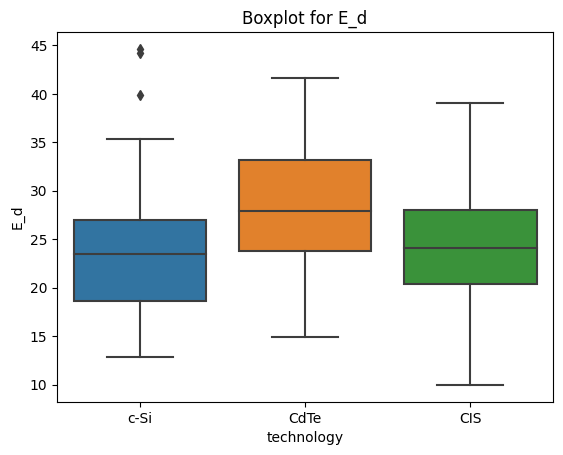

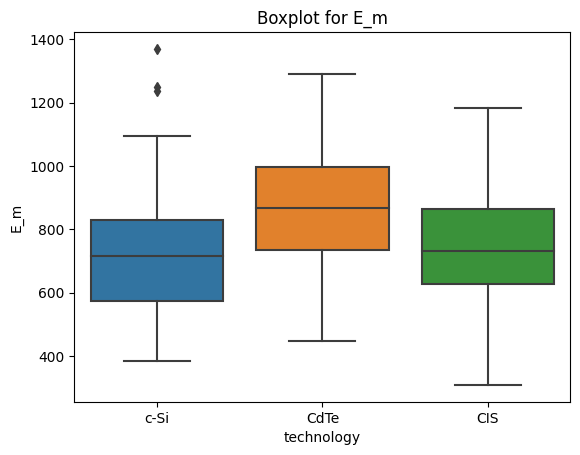

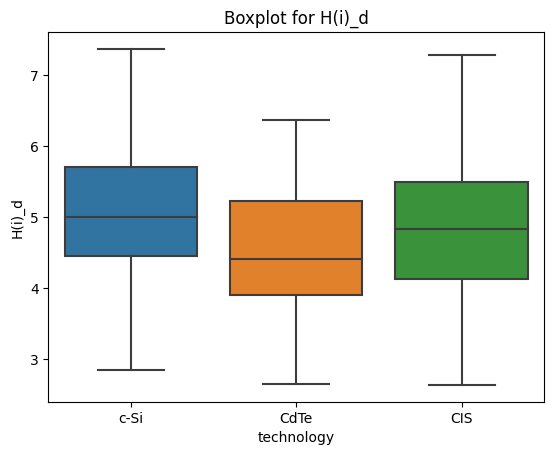

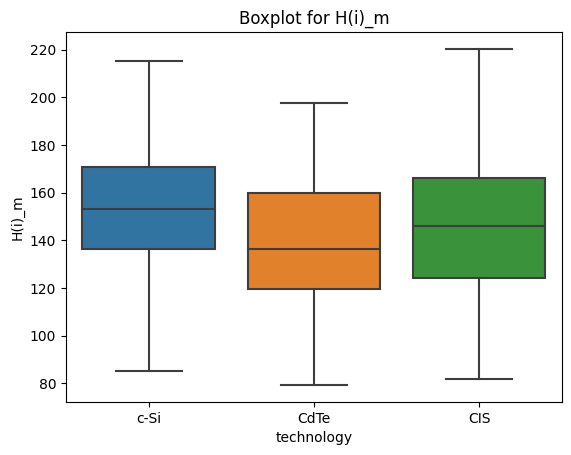

In [88]:
selected_features = ['E_d', 'E_m', 'H(i)_d','H(i)_m']  # Replace with your actual feature names
for feature in selected_features:
    sns.boxplot(x='technology', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
    plt.show()

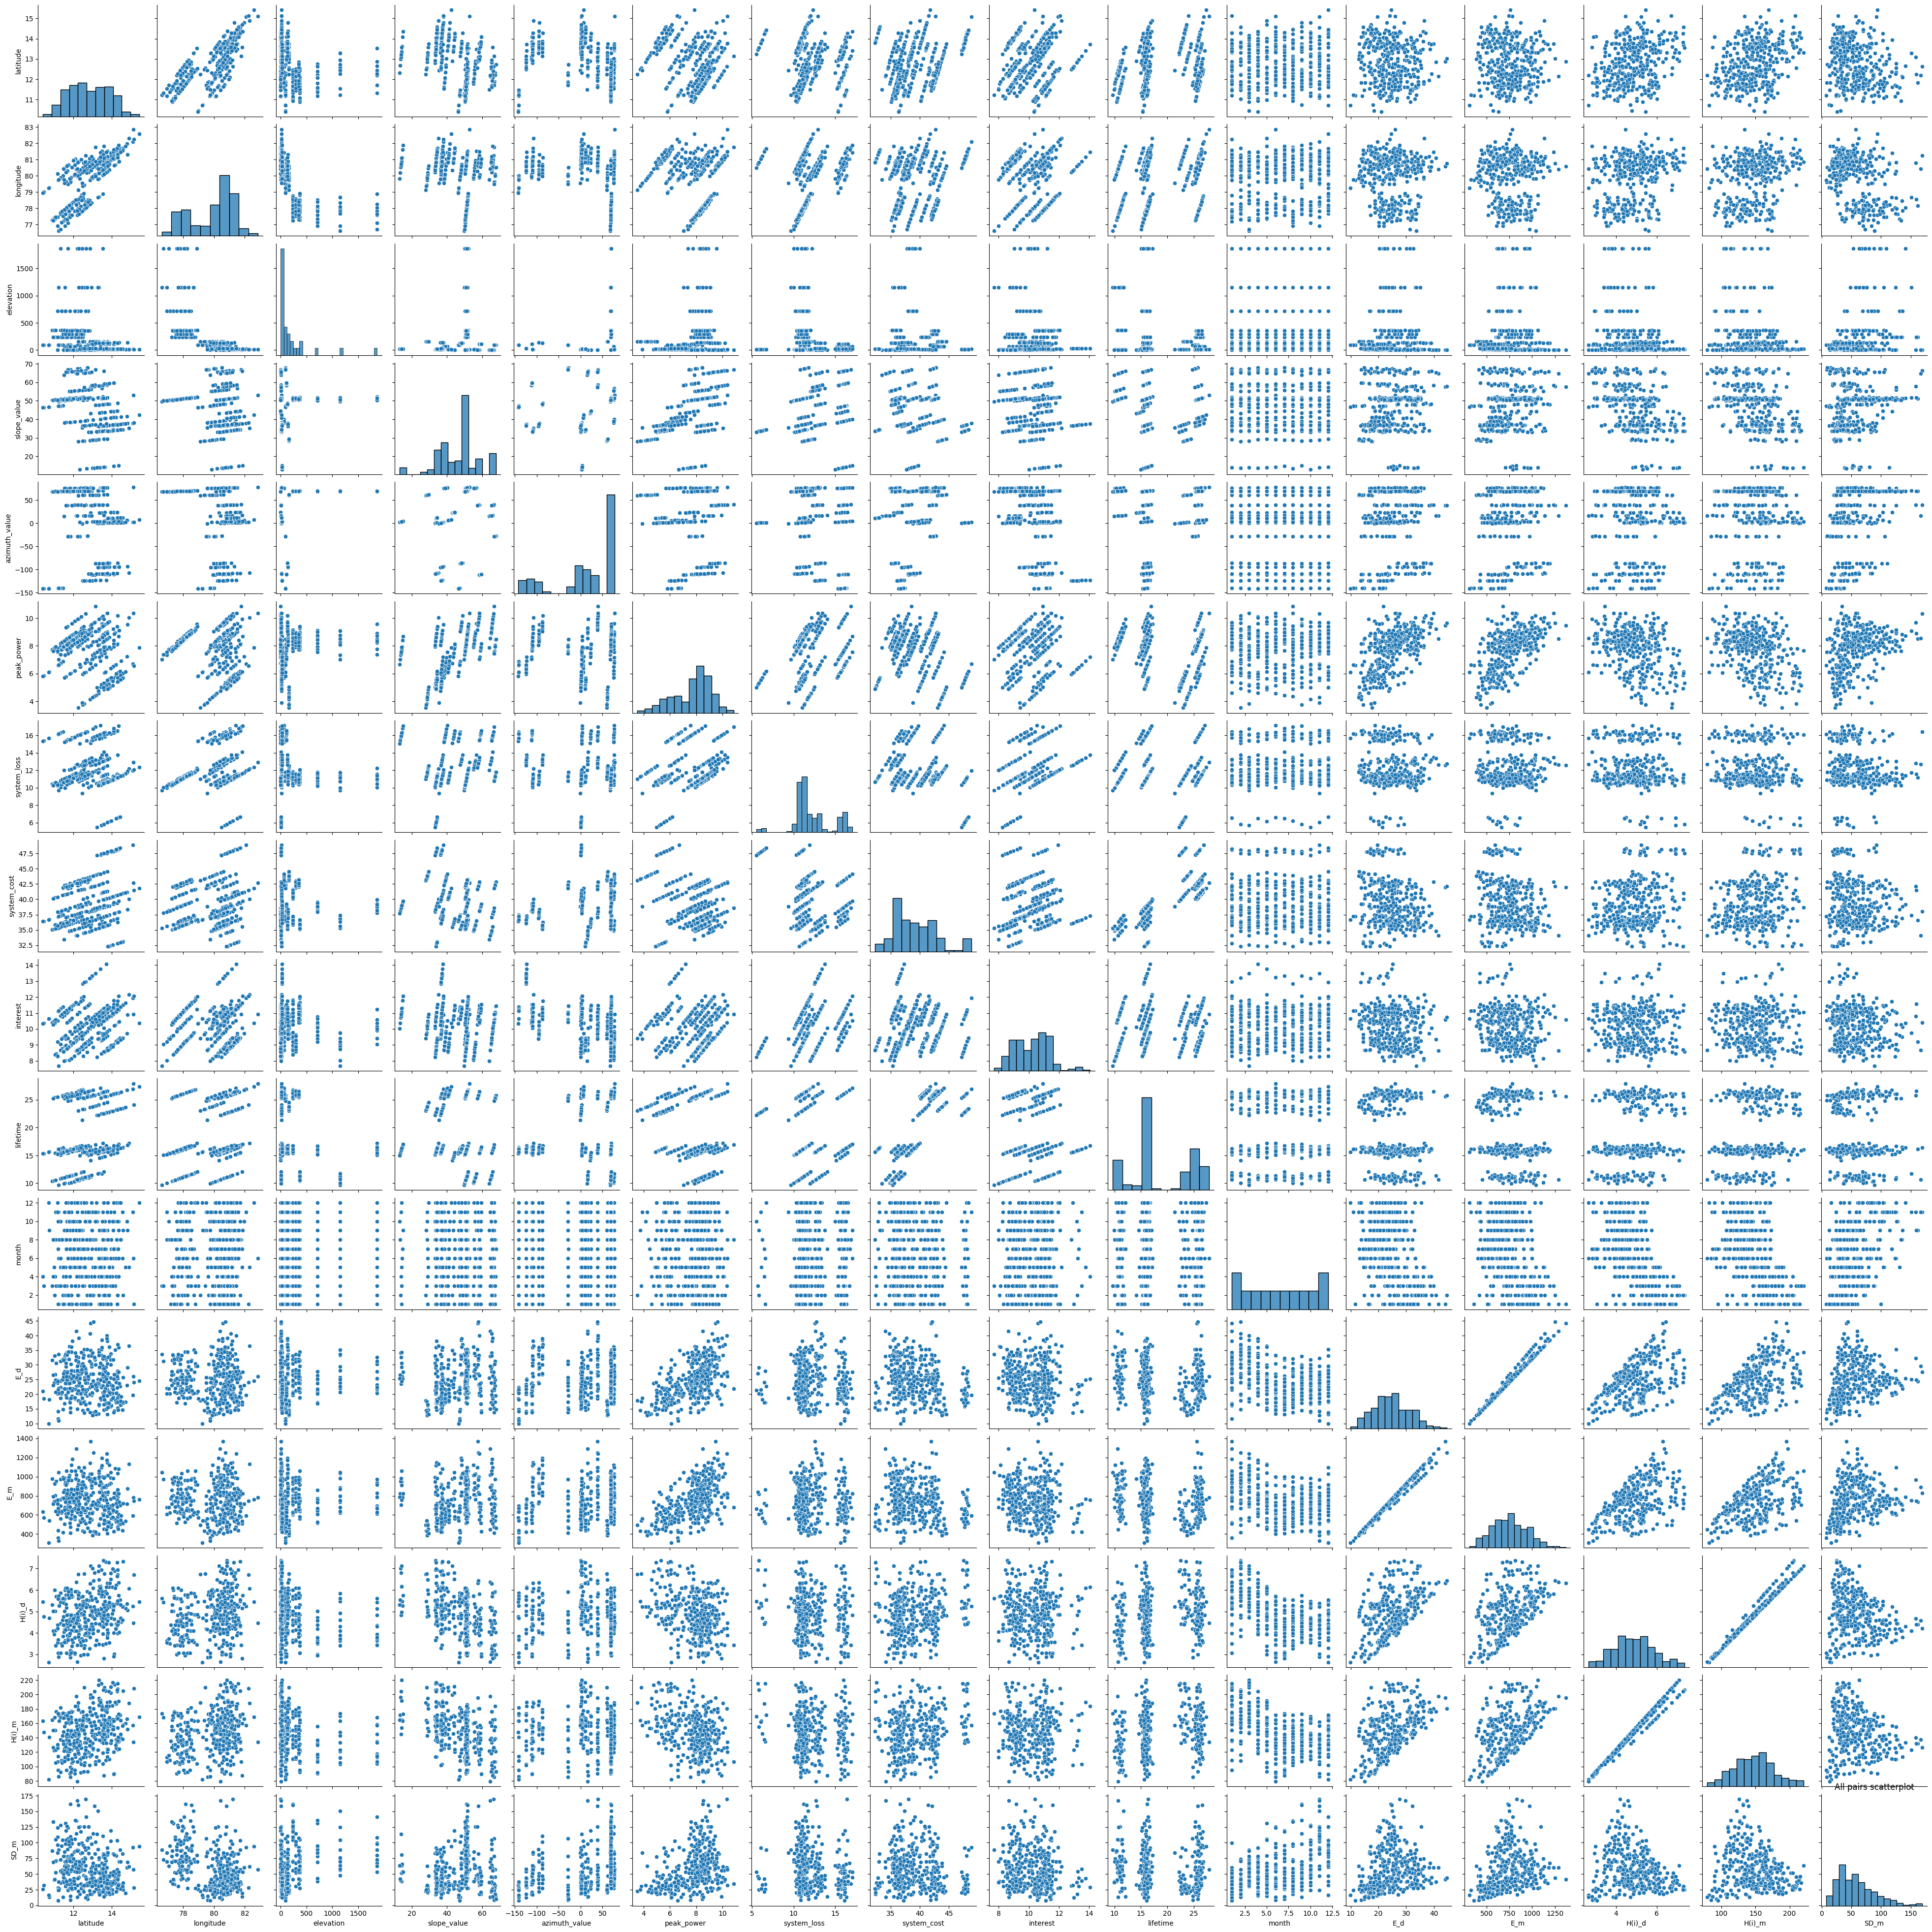

In [208]:
#PAIRED Scatterplot
sns.pairplot(df)
plt.title("All pairs scatterplot")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

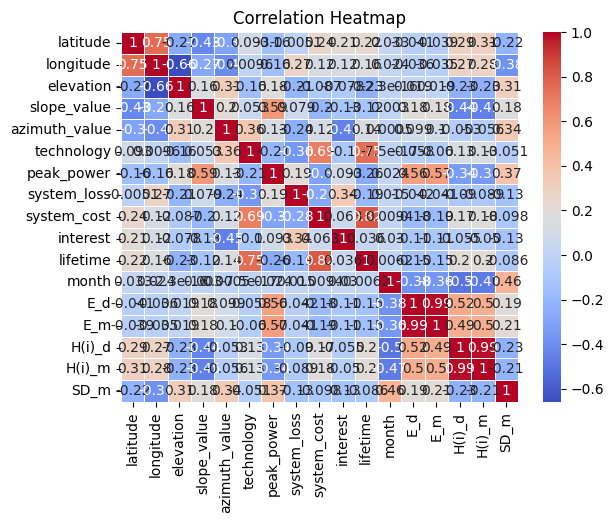

In [91]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm',linewidth = 0.5)
plt.title("Correlation Heatmap")

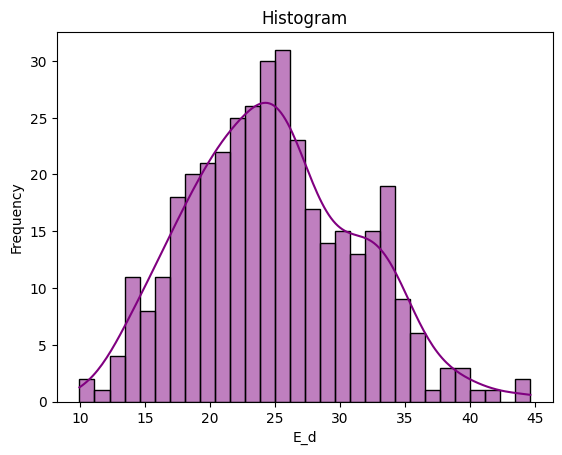

In [92]:
sns.histplot(df['E_d'], bins=30, color='purple', kde = True)
plt.title('Histogram')
plt.xlabel('E_d')
plt.ylabel('Frequency')
plt.show()

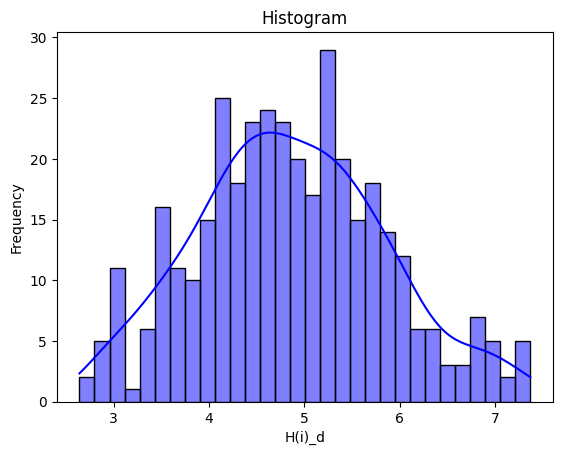

In [93]:
sns.histplot(df['H(i)_d'], bins=30, color='blue', kde = True)
plt.title('Histogram')
plt.xlabel('H(i)_d')
plt.ylabel('Frequency')
plt.show()

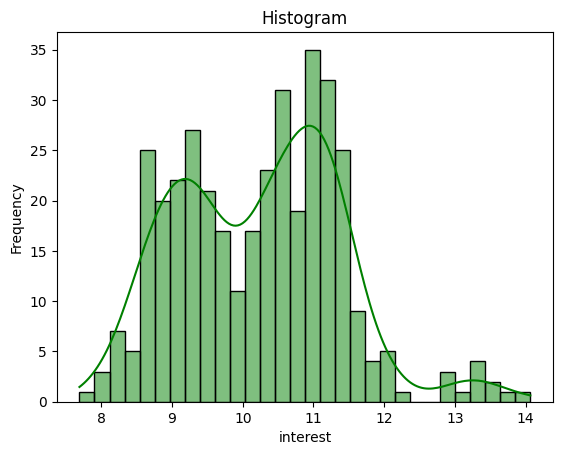

In [94]:
sns.histplot(df['interest'], bins=30, color='green', kde = True)
plt.title('Histogram')
plt.xlabel('interest')
plt.ylabel('Frequency')
plt.show()

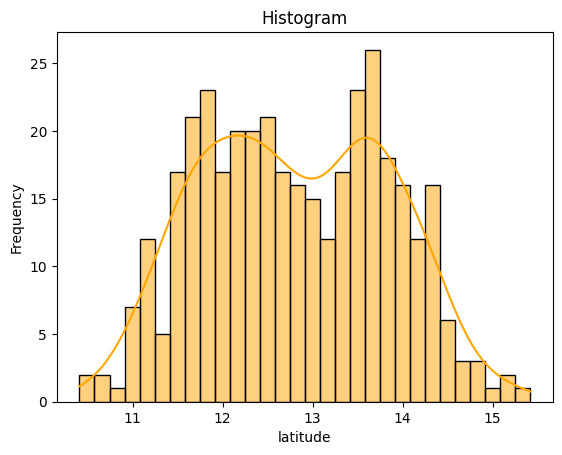

In [100]:
sns.histplot(df['latitude'], bins=30, color='orange', kde = True)
plt.title('Histogram')
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.show()

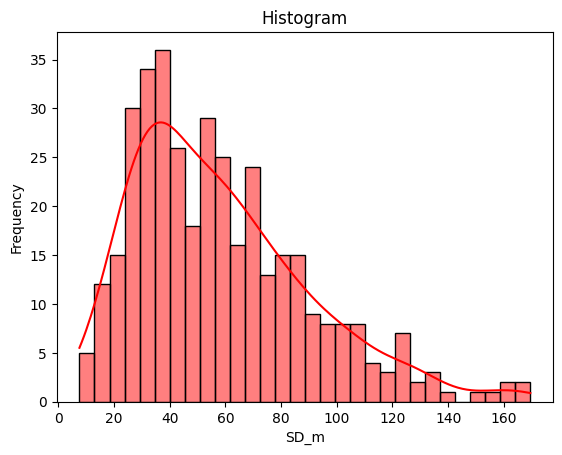

In [102]:
sns.histplot(df['SD_m'], bins=30, color='red', kde = True)
plt.title('Histogram')
plt.xlabel('SD_m')
plt.ylabel('Frequency')
plt.show()

### Scaling the data 

In [296]:
df['Technology_code'] = df['technology'].astype('category').cat.codes
codes = df[['Technology_code','technology']]

In [299]:
scaler = StandardScaler()
scaled_df = df.__deepcopy__()
scaled_df.drop(['technology'],axis = 1, inplace= True)
# Fit and transform the data
scaled_data = scaler.fit_transform(scaled_df)

# Convert the scaled data back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=scaled_df.columns)


In [300]:
df.describe()

latitude   longitude    elevation  slope_value  azimuth_value  \
count  372.000000  372.000000   372.000000   372.000000     372.000000   
mean    12.802776   79.903614   211.451613    46.585098      13.649614   
std      1.026553    1.404250   386.193603    11.441971      68.198284   
min     10.409772   76.604127     1.000000    13.023956    -141.660228   
25%     11.924853   78.490639    15.000000    37.159883       0.593297   
50%     12.751764   80.386821    66.000000    50.503118      38.674060   
75%     13.626057   80.947514   237.000000    51.513672      69.051039   
max     15.418085   82.867366  1865.000000    67.789606      77.926366   

       peak_power  system_loss  system_cost    interest    lifetime  \
count  372.000000   372.000000   372.000000  372.000000  372.000000   
mean     7.733808    12.173808    39.130582   10.225098   18.746389   
std      1.449520     2.248397     3.629904    1.152316    5.527596   
min      3.520165     5.492576    32.303545    7.690127    9.690127   
25%      6.636599    10.882869    36.391914    9.257361   15.483616   
50%      8.063680    11.406757    38.582554   10.376037   16.196757   
75%      8.735542    13.109184    41.835794   11.054478   25.314335   
max     10.856139    17.095228    48.893093   14.067678   27.926366   

            month         E_d          E_m      H(i)_d      H(i)_m  \
count  372.000000  372.000000   372.000000  372.000000  372.000000   
mean     6.500000   24.835376   754.302500    4.858629  147.568011   
std      3.456702    6.382039   190.304302    0.993341   29.327641   
min      1.000000    9.970000   309.090000    2.640000   79.380000   
25%      3.750000   20.322500   621.220000    4.177500  126.737500   
50%      6.500000   24.490000   744.045000    4.830000  147.005000   
75%      9.250000   29.287500   891.385000    5.505000  166.132500   
max     12.000000   44.630000  1369.270000    7.370000  220.280000   

             SD_m  Technology_code  
count  372.000000       372.000000  
mean    58.174140         0.967742  
std     31.513443         0.898656  
min      7.530000         0.000000  
25%     34.065000         0.000000  
50%     52.850000         1.000000  
75%     75.397500         2.000000  
max    169.530000         2.000000

## Regression Analysis

Now we perform a regression analysis to understand relationships in our data better. From the heat map, we understand that there exists a correlation between the latitude, Energy output (E_d), and Irradiation(H(i)_d).

we shall plot regression lines for these pairs of variables before we proceed to formulating hypothesis

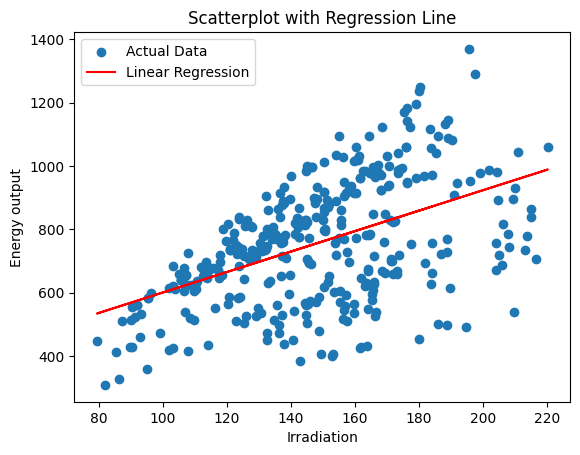

In [144]:
#Linear regression for H(i)_d and E_d
X = df['H(i)_m'].values.reshape(-1,1)

y = df['E_m']
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the original data and the regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Irradiation')
plt.ylabel('Energy output')
plt.legend()
plt.title('Scatterplot with Regression Line')
plt.show()

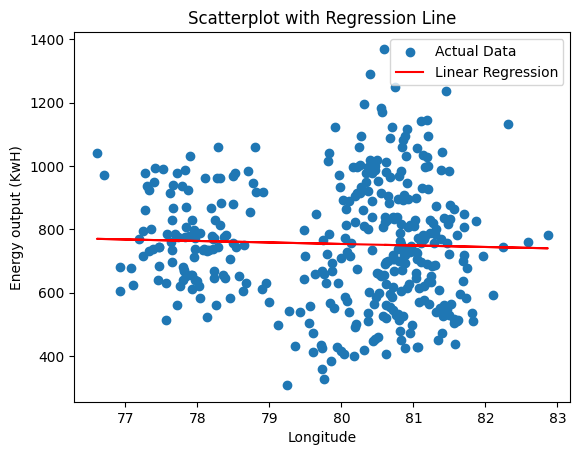

In [148]:
#Linear regression for H(i)_d and E_d
X = df['longitude'].values.reshape(-1,1)

y = df['E_m']
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the original data and the regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Longitude')
plt.ylabel('Energy output (KwH)')
plt.legend()
plt.axis('auto')
plt.title('Scatterplot with Regression Line')
plt.show()

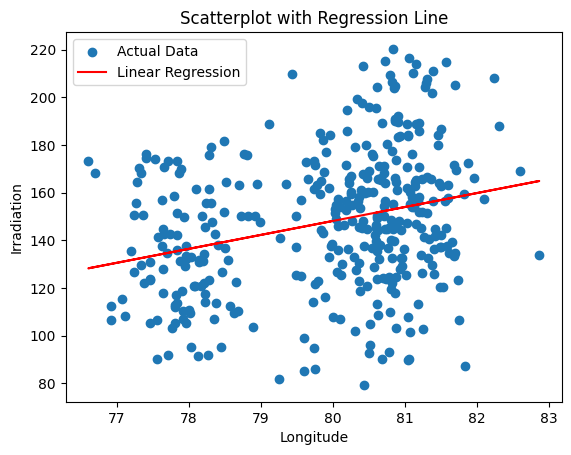

In [149]:
#Linear regression for H(i)_d and E_d
X = df['longitude'].values.reshape(-1,1)

y = df['H(i)_m']
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the original data and the regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Longitude')
plt.ylabel('Irradiation')
plt.legend()
plt.title('Scatterplot with Regression Line')
plt.show()

While it is noticed that we can fit a regression line to the above features, we must note that the relationship between those variables is not linear in nature. However there is a positive correlation between longitude and irradiation. There also exists a seemingly negative correlation between the longitude and Energy output, however the scatterplot and box plots show positive correlation that may not be linear

Geographically as longitude tends to increase, it assumes that the location is more east bound. 

## Hypothesis Testing. 

### Hypothesis 1 : Coastal regions have worse solar output than interior regions

To frame the above hypothesis, we can assume a sample of data that corresponds to locations that are closer to the coastal regions, and compute the mean of the monthly energy output of those regions. If this mean is lower than the population mean, then the hypothesis is rejected. 

H0 : sample mean = population mean 

H1 : sample mean < population mean

in order to decide the above, we have to classify the sample population. Thus we take a sample population of all the data points that are at a longitude greater than 80.1 degrees. Using that as the sample and the whole as the complete population, we can move forward with testing the hypothesis. 


In [260]:
#Sample and population of energy values where sample has all energy values corresponding to coastal regions. 
sample_energy = df[df['longitude']>81.3][['E_m']].values.flatten()
population_energy = df['E_m'].values.flatten()


Since we have about 50 samples in place, we shall perform a one tailed z test for this sample to test out hypothesis. 

In [261]:
population_mean_en= np.mean(population_energy)
sample_mean_en = np.mean(sample_energy)
sample_std_en = np.std(sample_energy)
n = len(sample_energy)
print(n)

48


In [262]:
z_score = (sample_mean_en - population_mean_en) / (sample_std_en / np.sqrt(n))

# Set the significance level (alpha)
alpha = 0.05

# Calculate the critical Z-value for a left-tailed test
critical_z_value = stats.norm.ppf(alpha)

# Print results
print(f"Sample Mean: {sample_mean_en}")
print(f"Z-Score: {z_score}")
print(f"Critical Z-Value: {critical_z_value}")



# Compare the p-value to the significance level
if z_score < critical_z_value:
    print("\nReject Null Hypothesis. Sample mean < population mean")
else:
    print("\nFailed to Reject null hypothesis")









Sample Mean: 707.6472916666667
Z-Score: -1.774500843473621
Critical Z-Value: -1.6448536269514729

Reject Null Hypothesis. Sample mean < population mean


Our null hypothesis states that the population mean and the sample mean are the same. Since it is rejected, we can state that coastal regions have lower energy outputs at a 95% confidence level

### Hypothesis 2 : Higher irradiation leads to higher energy output

As with the previous testing we shall perform a similar test to note if as we have higher irradiation values, the energy output improves. 

H0 : Population mean = sample mean

H1 : sample mean > population mean

Just as before we find the data points that have a irradiation greater than a certain value and test the energy sample for that. 

In [285]:
#Sample and population of irradiation values where sample has all irradiation values corresponding to interior regions. 
sample_irradiation = df[df['H(i)_m']>180][['E_d']].values.flatten()
population_irradiation = df['E_d'].values.flatten()


Knowing that there are about 61 values in the sample data, we opt for a left one tailed z test. 

In [286]:
population_mean_irr = np.mean(population_irradiation)
sample_mean_irr = np.mean(sample_irradiation)
sample_std_irr = np.std(sample_irradiation)
n = len(sample_irradiation)
print(n)

50


In [287]:
z_score = (sample_mean_irr - population_mean_irr) / (sample_std_irr / np.sqrt(n))

# Set the significance level (alpha)
alpha = 0.05

# Calculate the critical Z-value for a right-tailed test
critical_z_value = stats.norm.ppf(1-alpha)

# Print results
print(f"Sample Mean: {sample_mean_irr}")
print(f"Z-Score: {z_score}")
print(f"Critical Z-Value: {critical_z_value}")


# Compare the p-value to the significance level
if z_score > critical_z_value:
    print("\nReject Null hypothesis. sample mean > population mena")
else:
    print("\nFailed to Reject Null Hypothesis!")


Sample Mean: 28.7894
Z-Score: 3.892374559786816
Critical Z-Value: 1.6448536269514722

Reject Null hypothesis. sample mean > population mena


As our null hypothesis state that population mean = sample mean, we reject that. We accept that the population mean is lesser than the sample mean.

### Hypothesis 3 : F test for checking variance as per energy and irradiation for coastal regions

In [291]:
#F test 1 (F test to for checking homogeniety of variances)
sample_irradiation = df[df['longitude']>80.5][['H(i)_m']].values.flatten()
population_irradiation = df['H(i)_m'].values.flatten()
n = len(sample_irradiation)
print(n)


stat_irr, p_irr = stats.levene(population_irradiation,sample_irradiation)

alpha = 0.05
print(p_irr)
if p_irr < alpha:
    print("Reject the null hypothesis: Variances are not equal.")
else:
    print("Fail to reject the null hypothesis: Variances are equal.")

171
0.5018612597519334
Fail to reject the null hypothesis: Variances are equal.


In [196]:
sample_energy = df[df['longitude']>81.3][['E_m']].values.flatten()
population_energy = df['E_m'].values.flatten()


stat_en, p_en = stats.levene(sample_energy,population_energy)

alpha = 0.05
print(p_en)
if p_en < alpha:
    print("Reject the null hypothesis: Variances are not equal.")
else:
    print("Fail to reject the null hypothesis: Variances are equal.")

0.7672833190519652
Fail to reject the null hypothesis: Variances are equal.


Clearly, since there is not any change in the variance of the energy output of irradiation of with respect to longitude. We can conclude that all the samples takes are from the same population. Thus the differing of the means is of higher significance since they do so with the same variance.

### Hypothesis 4 : ANOVA for technology and energy output

In [214]:

type1 = df[df['technology'] == 'c-Si'][['E_m']].values.flatten()
type2 = df[df['technology'] == 'CIS'][['E_m']].values.flatten()
type3 = df[df['technology'] == 'CdTe'][['E_m']].values.flatten()

result_anova_energy = stats.f_oneway(type1,type2,type3)
print(f"Test Statistic (F-statistic): {result_anova_energy.statistic}")
print(f"P-Value: {result_anova_energy.pvalue}")

# Compare the p-value to a significance level
alpha = 0.05
if result_anova_energy.pvalue < alpha:
    print("Reject the null hypothesis: Means are not equal across categories.")
else:
    print("Fail to reject the null hypothesis: Means are equal across categories.")

Test Statistic (F-statistic): 13.273168281178283
P-Value: 2.713003954548856e-06
Reject the null hypothesis: Means are not equal across categories.


As per the conclusion, the performance of different PV technology is different. 

### Hypothesis 5 : Crystalline Silicon is prefered for higher energy output. 

While framing this hypothesis it is important we take into consideration that it has already been proven that the different PV technologies show different behaviors in terms of energy. This further test is to show that for efficient energy use, Crytstalline Silicon is prefered. 

H0 : The means of crystalline silicon is the same as the general population

H1 : The mean of crystalline silicon is greater than the general population

This call for a one tailed z-test. 

In [217]:
sample = df[df['technology'] == 'c-Si'][['E_m']].values.flatten()
population_energy = population_energy
population_mean_energy = np.mean(population_energy)
n = len(sample)



In [220]:
sample_mean_tech = np.mean(sample)
sample_std_tech = np.std(sample)

print(sample_mean_tech)

716.7942361111111


In [221]:
z_score = (sample_mean_tech - population_mean_energy) / (sample_std_tech / np.sqrt(n))

# Set the significance level (alpha)
alpha = 0.05



# Print results
print(f"Sample Mean: {sample_mean}")
print(f"Z-Score: {z_score}")
print(f"Critical Z-Value: {critical_z_value}")

alpha = 0.05

# Calculate the critical value for a right-tailed test
critical_value = stats.norm.ppf(1 - alpha)

# Compare the Z-score to the critical value
if z_score > critical_value:
    print(f"Reject the null hypothesis. Z-score: {z_score}, Critical Value: {critical_value}")
else:
    print(f"Fail to reject the null hypothesis. Z-score: {z_score}, Critical Value: {critical_value}")

Sample Mean: E_m    773.076526
dtype: float64
Z-Score: 36.79990620248375
Critical Z-Value: 1.6448536269514722
Reject the null hypothesis. Z-score: 36.79990620248375, Critical Value: 1.6448536269514722


Thus since we are rejecting the null hypothesis, we can say that Crystalline Silicon has a higher energy output. 

## Conclusions

From the above hypothesis testing, we draw the following conclusions 

#### Coastal regions have worse energy output

#### Irradiation improves energy output

#### There is a distince change in mean performance in coastal and interior regions, without affecting their variance

#### PV technology influences the Energy output 

#### Crystalline Silicon has the best energy output. 

These conclusions are helpful for predictive maintenance as, Crystalline Silicon has an average lifetime of about 23-25 years, and CdTe of about 10-15 years. 

For regions based in the coast, the average irradiation and energy output are not as high as those in interior regions. This goes to show that weather is a major player in energy output of solar panels. 

Thus, geographically speaking, it is advised for interior regions of tamil nadu to opt for Crystalline silicon or CIS technology for their solar panels, whereas coastal regions should prefer the CdTe technology which more cost efficient in cases of frequent replacements. 